# I. Introduction
The essence of this analysis lies in forecasting future demand, a pivotal factor influencing a retailer's operational efficiency and financial success. Through the utilization of advanced predictive modeling techniques, this project aims to uncover underlying patterns and anticipate future sales volumes, empowering the retailer to optimize inventory levels, refine procurement strategies, and elevate customer satisfaction by ensuring consistent product availability.

The significance of this initiative transcends mere forecasting; it serves as a strategic instrument to steer the business towards data-driven decision-making, mitigate the costs associated with inventory management, and ultimately bolster profitability.

To achieve these objectives, we will employ a Random Forest Regressor, renowned for its ability to handle complex, non-linear relationships in data. This model will be meticulously trained, validated, and fine-tuned using historical sales data, ensuring its efficacy and reliability in projecting future demand dynamics.

***The dataset can be downloaded [here](https://www.kaggle.com/datasets/tevecsystems/retail-sales-forecasting).***

# II. Import Libraries

In [ ]:
# For numerical computations and working with arrays.
import numpy as np
# For data manipulation and analysis, particularly useful for working with time series data.
import pandas as pd

# For data visualization, which is essential in the exploratory data analysis phase.
import matplotlib.pyplot as plt
import seaborn as sns

# The train_test_split function is used to split the dataset into training set and test set subsets randomly.
from sklearn.model_selection import train_test_split

# Import the RandomForestRegressor class from the ensemble module in the scikit-learn library (sklearn).
from sklearn.ensemble import RandomForestRegressor

# Import the mean_squared_error function from the metrics module in the scikit-learn (sklearn) library.
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error, mean_absolute_error

# Import the sqrt function from the math module.
from math import sqrt

# For saving and loading trained models (model persistence).
from joblib import load
import joblib

# III. Data Overview

Initial data inspection to get an understanding of the available features, data size, and data types. This includes looking at descriptive statistics, the number of rows and columns, and an initial check for missing values or anomalies.

##  Data Loading

In [ ]:
# To read the CSV file named "mock_kaggle.csv" and load it into a DataFrame.
df_main = pd.read_csv('/content/mock_kaggle.csv')

## Initial Inspection

In [ ]:
# Display the first 10 data entries.
df_main.head(10)

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
5,2014-01-06,145,4509,1.29
6,2014-01-07,179,4329,1.29
7,2014-01-08,321,4104,1.29
8,2014-01-09,125,4459,1.09
9,2014-01-10,88,5043,1.09


In [ ]:
# Displaying the last 10 data.
df_main.tail(10)

,data,venda,estoque,preco
927,2016-07-22,98,917,2.39
928,2016-07-23,133,1550,2.39
929,2016-07-24,130,1420,2.39
930,2016-07-25,62,1358,2.39
931,2016-07-26,97,2893,2.39
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39
936,2016-07-31,183,3642,2.39


In [ ]:
# Displaying the number of rows and columns in the dataframe.
df_main.shape

(937, 4)

In [ ]:
# Displaying basic information from the dataframe.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [ ]:
# Check for missing values.
missing_values_per_column = df_main.isna().sum()
print(missing_values_per_column)

data       0
venda      0
estoque    0
preco      0
dtype: int64


In [ ]:
# Check the percentage of missing values.
missing_percentage = df_main.isnull().mean() * 100
missing_percentage

data       0.0
venda      0.0
estoque    0.0
preco      0.0
dtype: float64

In [ ]:
# Check for duplicate rows in the dataset
duplicates = df_main.duplicated().sum()

# Output the number of duplicate rows found
print(f"Number of duplicate rows in the dataset: {duplicates}")

Number of duplicate rows in the dataset: 0


In [ ]:
# Calculate descriptive statistics for the dataframe
descriptive_statistics = df_main.describe()

# Include non-numeric data type columns in the description
descriptive_statistics_include_all = df_main.describe(include='all')

# Output the descriptive statistics
print(descriptive_statistics)

# Output the descriptive statistics including non-numeric columns
print(descriptive_statistics_include_all)

            venda      estoque       preco
count  937.000000   937.000000  937.000000
mean    90.533618  1608.258271    1.592572
std     80.682089  1356.691877    0.529502
min      0.000000     0.000000    0.000000
25%     33.000000   794.000000    1.290000
50%     76.000000  1348.000000    1.390000
75%    127.000000  1964.000000    1.890000
max    542.000000  7228.000000    2.980000
              data       venda      estoque       preco
count          937  937.000000   937.000000  937.000000
unique         937         NaN          NaN         NaN
top     2014-01-01         NaN          NaN         NaN
freq             1         NaN          NaN         NaN
mean           NaN   90.533618  1608.258271    1.592572
std            NaN   80.682089  1356.691877    0.529502
min            NaN    0.000000     0.000000    0.000000
25%            NaN   33.000000   794.000000    1.290000
50%            NaN   76.000000  1348.000000    1.390000
75%            NaN  127.000000  1964.000000    1.8900

In [ ]:
# Skewness and Kurtosis
print("Skewness of the data:")
print(df_main.skew(numeric_only=True))
print("\nKurtosis of the data:")
print(df_main.kurtosis(numeric_only=True))

# Count of NA values
print("\nCount of NA values in each column:")
print(df_main.isna().sum())

# Correlation matrix
print("\nCorrelation matrix of the data:")
print(df_main.corr(numeric_only=True))

Skewness of the data:
venda      1.426996
estoque    1.762215
preco      0.771904
dtype: float64

Kurtosis of the data:
venda      3.028264
estoque    3.662193
preco      0.474219
dtype: float64

Count of NA values in each column:
data       0
venda      0
estoque    0
preco      0
dtype: int64

Correlation matrix of the data:
            venda   estoque     preco
venda    1.000000  0.153659  0.094779
estoque  0.153659  1.000000 -0.032604
preco    0.094779 -0.032604  1.000000


### **Data Overview Summary :**
- ***Dataset Dimensions:*** The dataset consists of 937 rows and 4 columns.
- ***Column Composition:*** The dataset contains four columns: 'data', 'venda', 'estoque', & 'preco'. The names of these columns will be changed to English.
- ***Data Types:*** The 'data'/'date' column is not in the correct format and will be converted to the datetime type during data preprocessing.
- ***Data Integrity:*** The dataset is free of missing values and duplicate entries, ensuring the integrity of the analysis.

****Descriptive Statistics:****

- ***Sales (Venda):***
The average sales figure stands at approximately 90.53, with a minimum value of 0 and a maximum value of 542.
The standard deviation of sales is around 80.68.
The 25th percentile of sales is at 33, the median is at 76, and the 75th percentile is at 127.
- ***Inventory (Estoque):***
The average inventory level is approximately 1608.26, with a minimum value of 0 and a maximum value of 7228.
The standard deviation of inventory is around 1356.69.
The 25th percentile of inventory is at 794, the median is at 1348, and the 75th percentile is at 1964.
- ***Price (Preco):***
The average price is approximately 1.59, with a minimum value of 0 and a maximum value of 2.98.
The standard deviation of price is around 0.53.
The 25th percentile of price is at 1.29, the median is at 1.39, and the 75th percentile is at 1.89.

****Date Data Analysis:****

- There are 937 unique date entries.
- The earliest date recorded is "2014-01-01," which occurs once.

****Skewness Analysis:****

- Skewness measures the asymmetry of the data distribution.
 - For the 'venda' column, the skewness value is 1.427, indicating a right-skewed (positive) distribution for sales.
 - For the 'estoque' column, the skewness value is 1.762, indicating a right-skewed (positive) distribution for inventory.
 - For the 'preco' column, the skewness value is 0.772, indicating a right-skewed (positive) distribution for price.

****Kurtosis Analysis:****

- Kurtosis measures the peakedness of the data distribution.
 - For the 'venda' column, the kurtosis value is 3.028, indicating a sharper peak in the sales distribution compared to a normal distribution.
 - For the 'estoque' column, the kurtosis value is 3.662, indicating a very peaked distribution with more data near the mean for inventory.
 - For the 'preco' column, the kurtosis value is 0.474, indicating a less peaked (flatter) distribution for price compared to a normal distribution.

****Missing Values Analysis:****

There are no missing (NA) values in any of the columns. This eliminates the need for handling missing data in the dataset.

****Correlation Matrix Analysis:****

- The correlation between 'venda' and 'estoque' is 0.154, indicating a weak positive correlation between sales and inventory.
 - The correlation between 'venda' and 'preco' is 0.095, indicating a weak positive correlation between sales and price.
 - The correlation between 'estoque' and 'preco' is -0.033, indicating a very weak negative correlation between inventory and price.

This comprehensive overview lays a solid foundation for the subsequent stages of data preprocessing and exploratory data analysis.


## Initial Transforming

In [ ]:
# Make an independent copy of the main DataFrame.
df = df_main.copy()


From now onwards, we will use the ```'df'``` dataframe.

In [ ]:
# Change the column name 'data' to 'date', 'venda' to 'sales', 'estoque' to 'inventory', and 'preco' to 'price'.
df.rename(columns={'data': 'date', 'venda': 'sales', 'estoque': 'inventory', 'preco': 'price'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       937 non-null    object 
 1   sales      937 non-null    int64  
 2   inventory  937 non-null    int64  
 3   price      937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


# IV. Exploratory Data Analysis

In [ ]:
# Custom dataframe for EDA.
df_eda = df.copy()

##  Time Series Plot of Sales

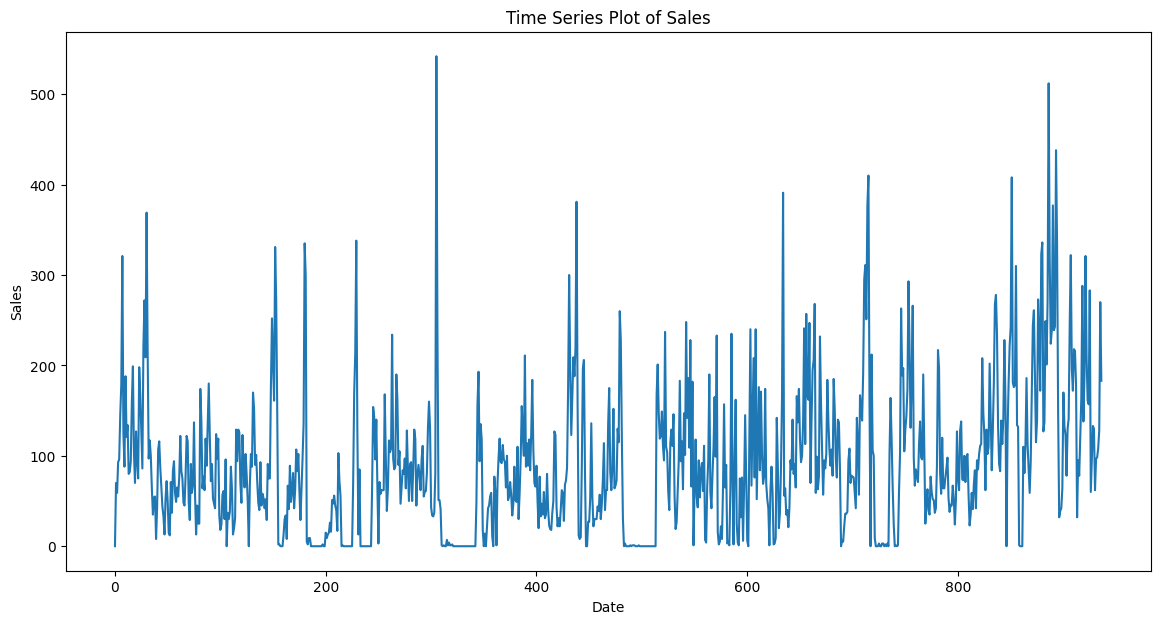

In [ ]:
# Time Series Plot
df_eda['sales'].plot(figsize=(14, 7))
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

- **Insight :** An upward or downward trend in sales over time could indicate the effectiveness of marketing strategies or shifts in consumer preferences.
- **Action :**
Conduct a deeper analysis to identify potential causes behind the trend and adjust your business strategies accordingly. For instance, if sales are growing, consider expanding your marketing efforts or product lines. If sales are declining, investigate possible reasons and consider new promotions or product adjustments.

## Rolling Mean and Standard Deviation of Sales

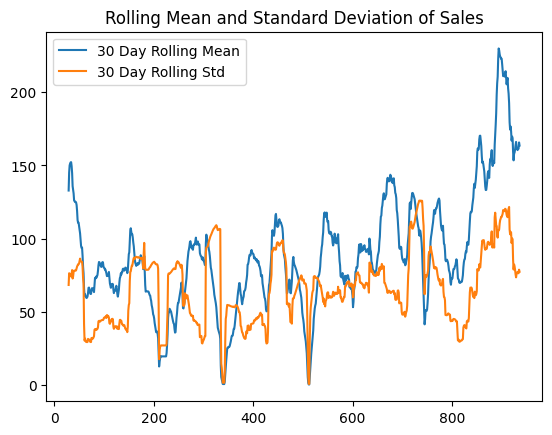

In [ ]:
# Rolling Statistics
df_eda['sales'].rolling(window=30).mean().plot(label='30 Day Rolling Mean')
df_eda['sales'].rolling(window=30).std().plot(label='30 Day Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Sales')
plt.show()

- **Insight :** An increasing rolling mean might suggest overall growth in sales, while an increasing rolling standard deviation indicates greater variability in sales.
- **Action :** Modify inventory or stocking levels based on observed trends to optimize stock levels and reduce the risk of stockouts or excess inventory. This could also involve adjusting your supply chain planning to be more responsive to sales volatility.

## Sales Ditribution

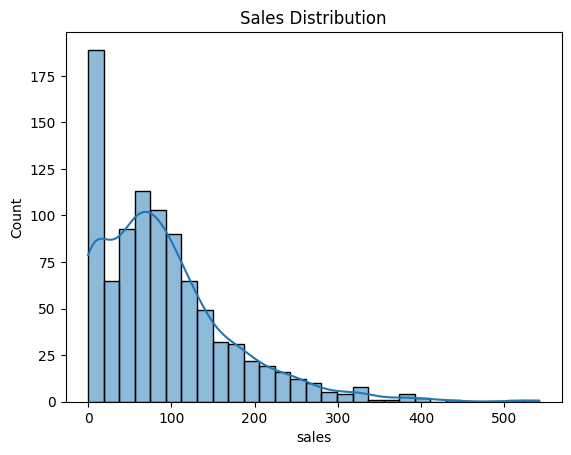

In [ ]:
# Histogram and Density Plot
sns.histplot(df_eda['sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

- **Insight :** The shape of the sales distribution can indicate a high concentration of transactions within certain price or volume ranges.
- **Action :** Focus marketing efforts and inventory on the most frequent sales price or volume segments to maximize profits.

## Correlation Heatmap

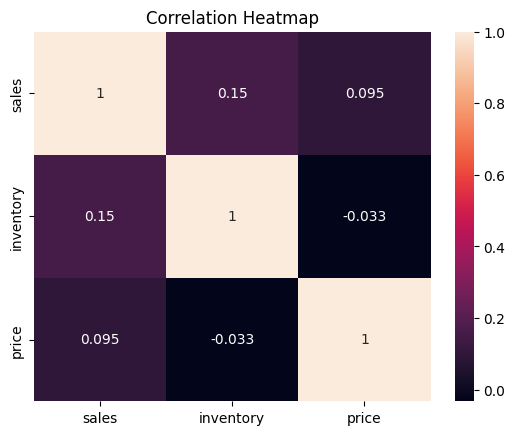

In [ ]:
# Correlation Heatmap
correlation_matrix = df_eda[['sales', 'inventory', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

- **Insight :** A significant positive or negative correlation between variables like inventory and sales could indicate relationships that might be leveraged or monitored.
- **Action :** If inventory and sales are highly correlated, ensure adequate stock levels to meet anticipated demand. If price and sales are negatively correlated, consider more aggressive pricing strategies.

## Price VS Sales

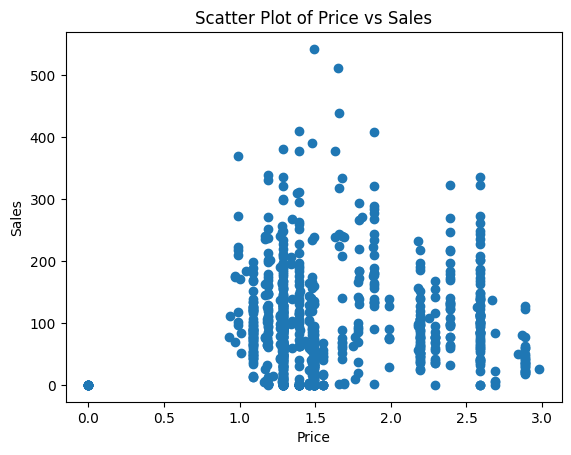

In [ ]:
# Scatter Plot
plt.scatter(df_eda['price'], df_eda['sales'])
plt.title('Scatter Plot of Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

- **Insight :** Patterns in the scatter plot between price and sales could indicate price sensitivity. For example, if sales decrease when prices increase, this suggests high price elasticity.
- **Action :** Test different pricing to see its effect on sales and use this information to formulate an optimal pricing strategy.

# V. Feature Engineering

In [ ]:
# Changed the 'date' column to datetime.
df['date'] = pd.to_datetime(df['date'])

# Group by month and year, and aggregate sales and stock.
df = df.groupby(df['date'].dt.to_period('M')).agg({'sales':'sum', 'inventory':'mean', 'price':'mean'}).reset_index()

# Changed the 'date' column format to MM-YYYY.
df['date'] = df['date'].dt.strftime('%m-%Y')
df.head()

,date,sales,inventory,price
0,01-2014,3985,4224.566667,1.150000
1,02-2014,2018,5085.923077,1.120769
2,03-2014,2137,4635.137931,1.196552
3,04-2014,1990,1975.166667,1.196667
4,05-2014,2493,2036.032258,1.346129


In [ ]:
df = df.drop(columns=['inventory', 'price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


<Axes: >

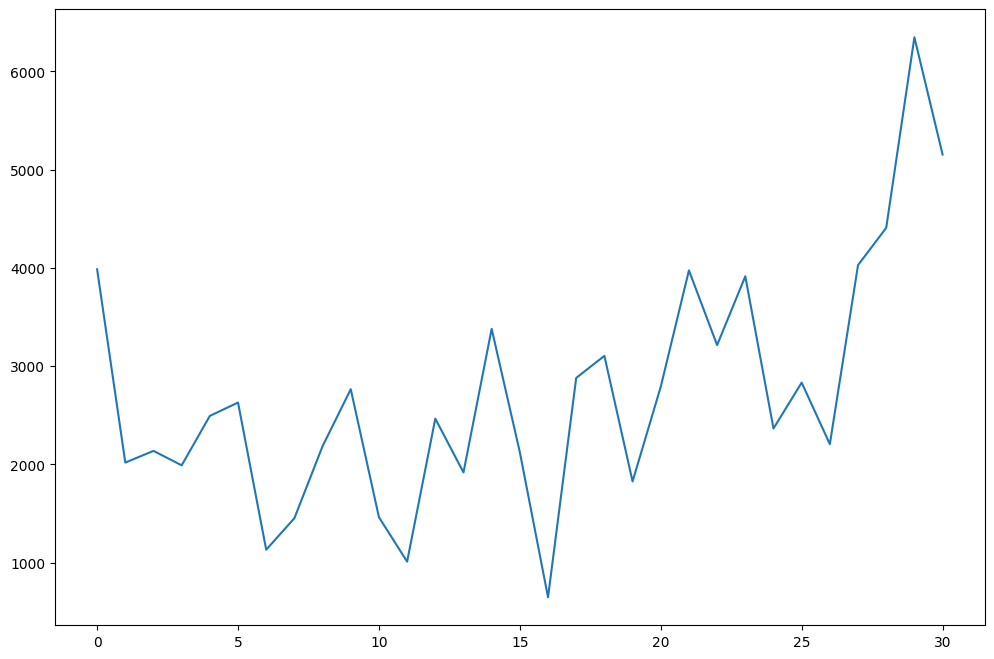

In [ ]:
df['sales'].plot(figsize=(12, 8))


In [ ]:
df['Sale_LastMonth']=df['sales'].shift(+1)
df['Sale_2Monthsback']=df['sales'].shift(+2)
df['Sale_3Monthsback']=df['sales'].shift(+3)
df

,date,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
0,01-2014,3985,NaN,NaN,NaN
1,02-2014,2018,3985.0,NaN,NaN
2,03-2014,2137,2018.0,3985.0,NaN
3,04-2014,1990,2137.0,2018.0,3985.0
4,05-2014,2493,1990.0,2137.0,2018.0
5,06-2014,2629,2493.0,1990.0,2137.0
6,07-2014,1131,2629.0,2493.0,1990.0
7,08-2014,1452,1131.0,2629.0,2493.0
8,09-2014,2185,1452.0,1131.0,2629.0
9,10-2014,2765,2185.0,1452.0,1131.0


In [ ]:
df=df.dropna()
df

,date,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
3,04-2014,1990,2137.0,2018.0,3985.0
4,05-2014,2493,1990.0,2137.0,2018.0
5,06-2014,2629,2493.0,1990.0,2137.0
6,07-2014,1131,2629.0,2493.0,1990.0
7,08-2014,1452,1131.0,2629.0,2493.0
8,09-2014,2185,1452.0,1131.0,2629.0
9,10-2014,2765,2185.0,1452.0,1131.0
10,11-2014,1462,2765.0,2185.0,1452.0
11,12-2014,1010,1462.0,2765.0,2185.0
12,01-2015,2465,1010.0,1462.0,2765.0


# VI. Model Definition

In [ ]:
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

# VII. Model Training

In [ ]:
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[2137. 2018. 3985.]
 [1990. 2137. 2018.]
 [2493. 1990. 2137.]
 [2629. 2493. 1990.]
 [1131. 2629. 2493.]
 [1452. 1131. 2629.]
 [2185. 1452. 1131.]
 [2765. 2185. 1452.]
 [1462. 2765. 2185.]
 [1010. 1462. 2765.]
 [2465. 1010. 1462.]
 [1918. 2465. 1010.]
 [3379. 1918. 2465.]
 [2123. 3379. 1918.]
 [ 647. 2123. 3379.]
 [2880.  647. 2123.]
 [3104. 2880.  647.]
 [1826. 3104. 2880.]
 [2790. 1826. 3104.]
 [3974. 2790. 1826.]
 [3214. 3974. 2790.]
 [3914. 3214. 3974.]
 [2365. 3914. 3214.]
 [2832. 2365. 3914.]
 [2206. 2832. 2365.]
 [4028. 2206. 2832.]
 [4407. 4028. 2206.]
 [6347. 4407. 4028.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_x, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

<ipython-input-28-d768f88d541e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_features=3, random_state=1)

# VIII. Model Evaluation

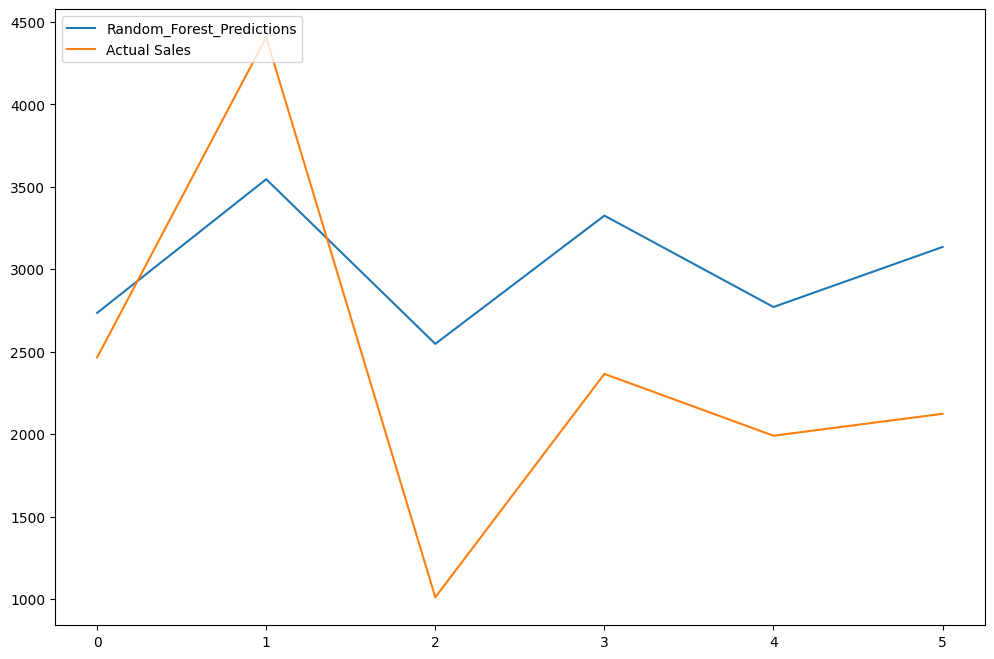

In [ ]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
rmse_rf=sqrt(mean_squared_error(pred,y_test))
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 977.4514101478394


# IX. Model Saving

In [ ]:
# Save the model to disk
filename = 'finalized_model.joblib'
joblib.dump(model, filename)

['finalized_model.joblib']

# X. Model Inference

In [ ]:
rf_model = load('/content/finalized_model.joblib')

In [ ]:
last_month_sale = 120  # Contoh nilai penjualan bulan lalu
two_months_ago_sale = 110  # Contoh nilai penjualan dua bulan lalu
three_months_ago_sale = 100  # Contoh nilai penjualan tiga bulan lalu

new_data = [[last_month_sale, two_months_ago_sale, three_months_ago_sale]]
predictions = rf_model.predict(new_data)
print("Hasil prediksi penjualan: ", predictions[0])

Hasil prediksi penjualan:  2538.6
